In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sample/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Langkah 1: Identifikasi Fitur dan Target
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

# Ubah data kategorikal menjadi numerik dengan OneHotEncoder atau LabelEncoder
X = pd.get_dummies(X, drop_first=True)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Langkah 3: Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Langkah 4: Buat Model Multiple Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Langkah 5: Prediksi pada Data Uji
y_pred = model.predict(X_test)

In [8]:
# Langkah 6: Evaluasi Model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

R-squared: 0.7835929767120723
MSE: 33596915.85136147
MAE: 4181.1944737536505


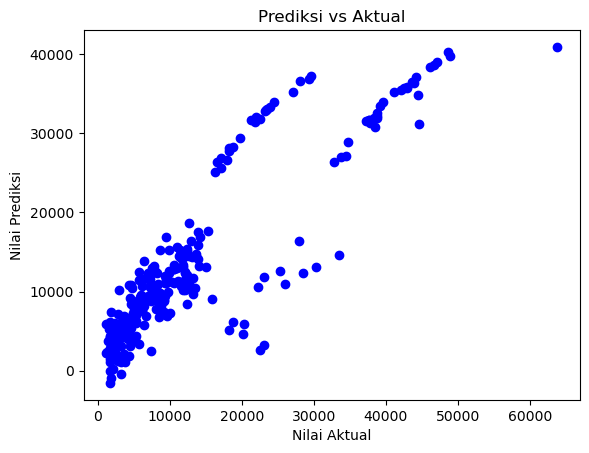

In [9]:
# Langkah 7: Visualisasi
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi vs Aktual')
plt.show()

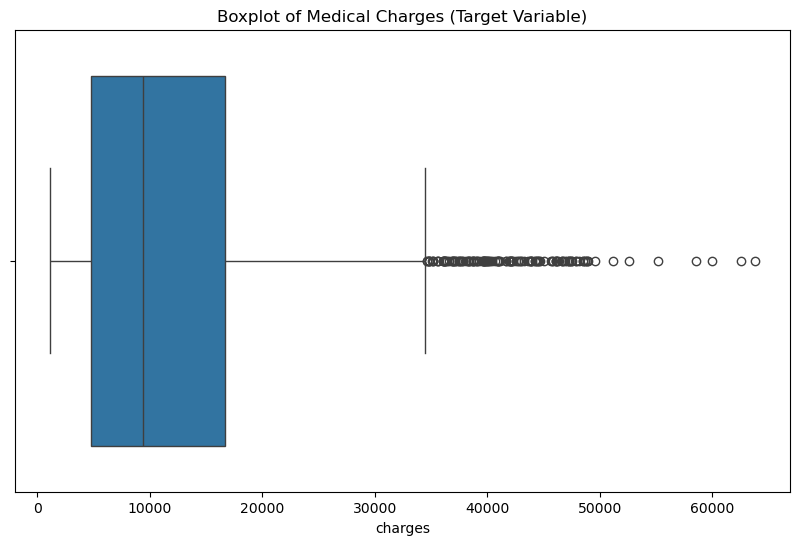

Number of outliers: 139


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers using boxplot for the 'charges' column (target variable)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['charges'])
plt.title('Boxplot of Medical Charges (Target Variable)')
plt.show()

# Check for statistical outliers using IQR method for the 'charges' column
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside 1.5 * IQR from Q1 and Q3
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]
print(f'Number of outliers: {outliers.shape[0]}')

In [11]:
import numpy as np
df['charges_log'] = np.log(df['charges'])

In [12]:
from sklearn.model_selection import train_test_split

# Menggunakan variabel target yang sudah ditransformasikan
X = df.drop(columns=['charges', 'charges_log'])
y = df['charges_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,0,27.900,0,1,3,16884.92400,9.734176
1,18,1,33.770,1,0,2,1725.55230,7.453302
2,28,1,33.000,3,0,2,4449.46200,8.400538
3,33,1,22.705,0,0,1,21984.47061,9.998092
4,32,1,28.880,0,0,1,3866.85520,8.260197


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'female'

In [20]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

y_pred = regressor.predict(X_test_scaled)

NameError: name 'X_train_scaled' is not defined